In [1]:
import pandas as pd

In [2]:
a = pd.read_csv("insurance_data.csv")
a

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [3]:
a.columns[a.isna().any()]

Index([], dtype='object')

In [4]:
a.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [6]:
x=a[["age"]]
#x
y=a["bought_insurance"]
#x=a.iloc[:,0]
import numpy as np
x=np.array(x).reshape(-1,1)
x
y=np.array(y)
y

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train

array([[50],
       [25],
       [46],
       [56],
       [47],
       [55],
       [40],
       [52],
       [54],
       [45],
       [19],
       [23],
       [21],
       [60],
       [18],
       [49],
       [18],
       [55]])

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
y_pred=lr.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0])

In [12]:
x_test

array([[62],
       [29],
       [61],
       [26],
       [22],
       [28],
       [25],
       [58],
       [27]])

In [13]:
y_test

array([1, 0, 1, 0, 0, 0, 1, 1, 0])

In [14]:
from sklearn.metrics import r2_score

In [15]:
r2_score(y_test,y_pred)

0.55

In [16]:
# Sort x_train and corresponding predictions
import numpy as np
sorted_idx = np.argsort(x_train)
x_s= x_train[sorted_idx]
y_s= y_pred[sorted_idx]

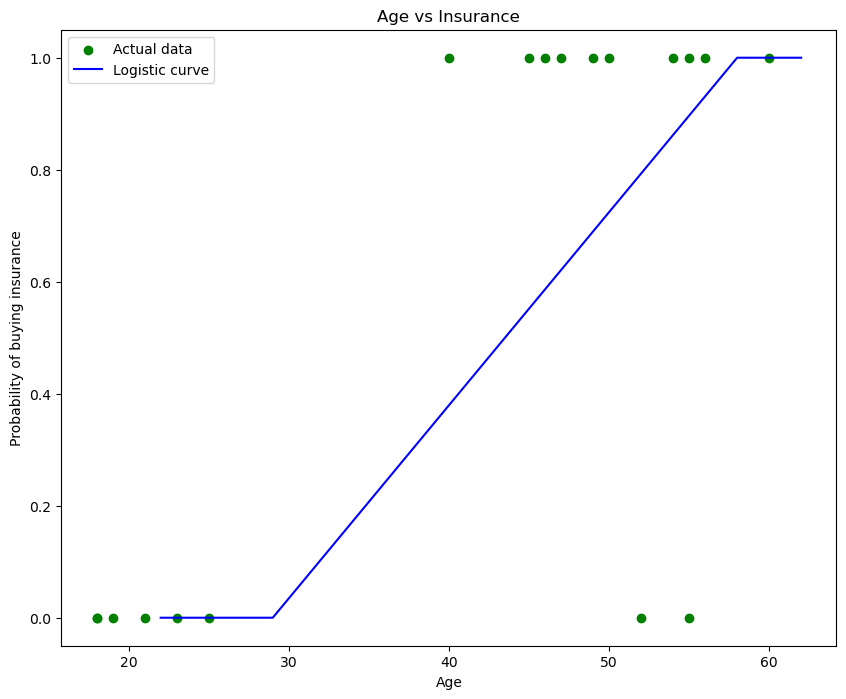

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sort x_test and y_pred together
sorted_idx = np.argsort(x_test.flatten())
x_test_sorted = x_test.flatten()[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.figure(figsize=(10,8))
plt.scatter(x_train, y_train, color="green", label="Actual data")
plt.plot(x_test_sorted, y_pred_sorted, color="blue", label="Logistic curve")
plt.title("Age vs Insurance")
plt.xlabel("Age")
plt.ylabel("Probability of buying insurance")
plt.legend()
plt.show()

   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes
None
age                 0
bought_insurance    0
dtype: int64
             age  bought_insurance
count  27.000000         27.000000
mean   39.666667          0.518519
std    15.745573          0.509175
min    18.000000          0.000000
25%    25.000000          0.000000
50%    45.000000          1.000000
75%    54.500000          1.000000
max    62.000000          1.000000


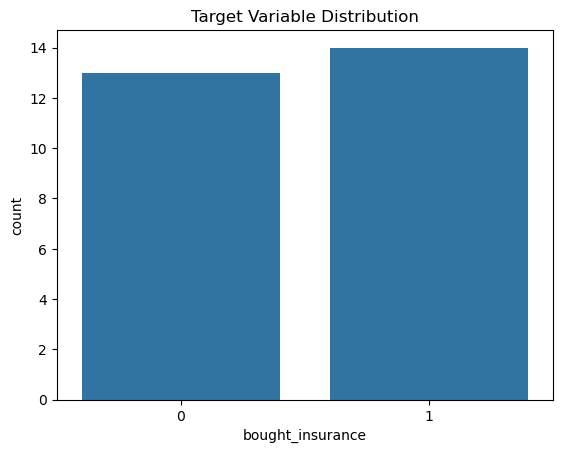

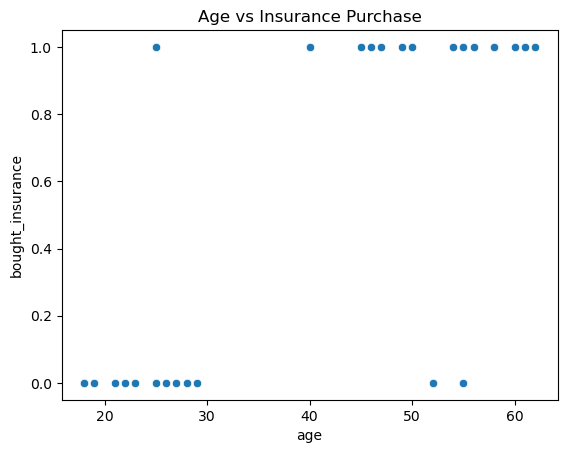

Accuracy: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



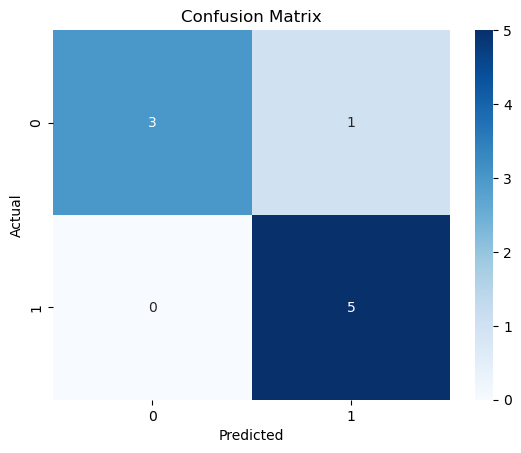

ROC-AUC Score: 0.925


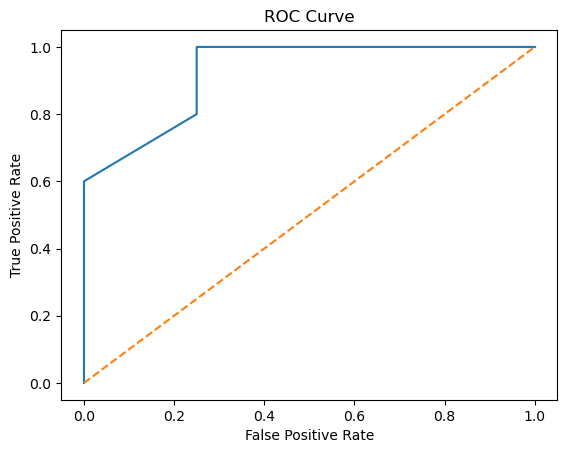

Model Coefficient: [[1.40364593]]
Model Intercept: [0.02914736]
Prediction (0=No, 1=Yes): 0
Purchase Probability: 0.4787698189746704


C:\Users\Livewire\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
# ==============================
# 1. Import Required Libraries
# ==============================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# ==============================
# 2. Load Dataset
# ==============================
df = pd.read_csv("insurance_data.csv")  # update path if needed

# ==============================
# 3. Data Validation
# ==============================
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())

# ==============================
# 4. Exploratory Data Analysis
# ==============================
sns.countplot(x="bought_insurance", data=df)
plt.title("Target Variable Distribution")
plt.show()

sns.scatterplot(x="age", y="bought_insurance", data=df)
plt.title("Age vs Insurance Purchase")
plt.show()

# ==============================
# 5. Feature Selection
# ==============================
X = df[["age"]]
y = df["bought_insurance"]

# ==============================
# 6. Train-Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ==============================
# 7. Feature Scaling
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================
# 8. Model Training
# ==============================
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# ==============================
# 9. Predictions
# ==============================
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# ==============================
# 10. Model Evaluation
# ==============================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# ==============================
# 11. Model Interpretation
# ==============================
print("Model Coefficient:", model.coef_)
print("Model Intercept:", model.intercept_)

# ==============================
# 12. Sample Prediction
# ==============================
sample_age = [[35]]
sample_age_scaled = scaler.transform(sample_age)

prediction = model.predict(sample_age_scaled)
probability = model.predict_proba(sample_age_scaled)

print("Prediction (0=No, 1=Yes):", prediction[0])
print("Purchase Probability:", probability[0][1])

C:\Users\Livewire\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


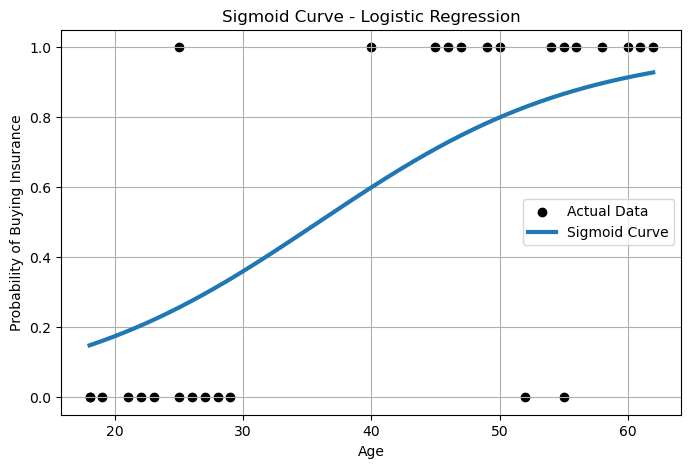

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generate age values
age_range = np.linspace(X["age"].min(), X["age"].max(), 300).reshape(-1, 1)

# Scale age values using trained scaler
age_range_scaled = scaler.transform(age_range)

# Get predicted probabilities
probabilities = model.predict_proba(age_range_scaled)[:, 1]

# Plot Sigmoid Curve
plt.figure(figsize=(8, 5))
plt.scatter(X["age"], y, color="black", label="Actual Data")
plt.plot(age_range, probabilities, linewidth=3, label="Sigmoid Curve")
plt.xlabel("Age")
plt.ylabel("Probability of Buying Insurance")
plt.title("Sigmoid Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()